In [172]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
# get all file path in the current directory with "large" in the name
def get_large_files():
    files = []
    for file in os.listdir('.'):
        files.append(file)
    return files

In [174]:
paths = get_large_files()

In [175]:
paths_filtered = [path for path in paths if 'family' in path]

In [176]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [177]:
df_main.sort_values("val_accuracy", ascending=False)

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model
23,4,0.236983,0.317884,0.910226,0.910204,0.909478,0.912820,0.911146,0.970541,detect-llama-family,Llama-3.1-8B-Instruct
24,5,0.232309,0.317994,0.909651,0.909565,0.902948,0.919674,0.911234,0.970655,detect-llama-family,Llama-3.1-8B-Instruct
22,3,0.248227,0.334364,0.902713,0.902421,0.878325,0.936848,0.906643,0.969202,detect-llama-family,Llama-3.1-8B-Instruct
21,2,0.269181,0.345890,0.900053,0.900289,0.925012,0.872523,0.898001,0.966586,detect-llama-family,Llama-3.1-8B-Instruct
54,5,0.244352,0.356557,0.899475,0.899500,0.903417,0.896485,0.899938,0.963397,detect-llama-family,Llama-3.2-3B-Instruct
...,...,...,...,...,...,...,...,...,...,...,...
6,2,0.540236,0.547027,0.764597,0.766164,0.720566,0.849710,0.779827,0.866384,detect-phi-family,Phi-3-small-128k-instruct
30,1,0.586615,0.587921,0.759522,0.759767,0.788536,0.712642,0.748671,0.849717,detect-qwen-family,Qwen2-7B-Instruct
0,1,0.563051,0.547691,0.759128,0.757829,0.791661,0.690497,0.737627,0.840483,detect-phi-family,Phi-4-mini-instruct
25,1,0.581056,0.636007,0.739641,0.740372,0.835744,0.599874,0.698433,0.851950,detect-qwen-family,Qwen2.5-7B-Instruct


In [178]:
df_main.sort_values("val_loss", ascending=True)

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model
23,4,0.236983,0.317884,0.910226,0.910204,0.909478,0.912820,0.911146,0.970541,detect-llama-family,Llama-3.1-8B-Instruct
24,5,0.232309,0.317994,0.909651,0.909565,0.902948,0.919674,0.911234,0.970655,detect-llama-family,Llama-3.1-8B-Instruct
44,5,0.269463,0.319834,0.893209,0.892952,0.903263,0.876860,0.889866,0.962118,detect-mistral-family,Mistral-Nemo-Instruct-2407
43,4,0.280010,0.321185,0.890231,0.890182,0.889509,0.887088,0.888297,0.959786,detect-mistral-family,Mistral-Nemo-Instruct-2407
42,3,0.301576,0.332668,0.888886,0.889099,0.875591,0.902379,0.888784,0.959242,detect-mistral-family,Mistral-Nemo-Instruct-2407
...,...,...,...,...,...,...,...,...,...,...,...
55,1,0.547006,0.575609,0.766098,0.765951,0.753644,0.794243,0.773411,0.852216,detect-qwen-family,Qwen2.5-3B-Instruct
56,2,0.487180,0.582875,0.765991,0.766404,0.818261,0.686983,0.746898,0.864661,detect-qwen-family,Qwen2.5-3B-Instruct
30,1,0.586615,0.587921,0.759522,0.759767,0.788536,0.712642,0.748671,0.849717,detect-qwen-family,Qwen2-7B-Instruct
35,1,0.556880,0.625096,0.725706,0.722786,0.897171,0.501561,0.643420,0.849370,detect-phi-family,Phi-3.5-mini-instruct


In [179]:
df_main.loc[df_main.groupby(["dataset"])["val_loss"].idxmin()]

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model
12,3,0.389305,0.505975,0.804005,0.804164,0.780245,0.844228,0.810976,0.885777,detect-falcon-family,Falcon3-3B-Instruct
23,4,0.236983,0.317884,0.910226,0.910204,0.909478,0.912820,0.911146,0.970541,detect-llama-family,Llama-3.1-8B-Instruct
44,5,0.269463,0.319834,0.893209,0.892952,0.903263,0.876860,0.889866,0.962118,detect-mistral-family,Mistral-Nemo-Instruct-2407
79,5,0.443961,0.457447,0.825320,0.824852,0.836886,0.799860,0.817954,0.909017,detect-phi-family,phi-4
64,5,0.460891,0.509232,0.805327,0.805357,0.810524,0.799585,0.805017,0.891114,detect-qwen-family,Qwen2.5-14B-Instruct


In [180]:
df_main.loc[df_main.groupby(["dataset"])["val_accuracy"].idxmax()]

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model
14,5,0.374081,0.522911,0.806944,0.806947,0.805155,0.807850,0.806500,0.888509,detect-falcon-family,Falcon3-3B-Instruct
23,4,0.236983,0.317884,0.910226,0.910204,0.909478,0.912820,0.911146,0.970541,detect-llama-family,Llama-3.1-8B-Instruct
44,5,0.269463,0.319834,0.893209,0.892952,0.903263,0.876860,0.889866,0.962118,detect-mistral-family,Mistral-Nemo-Instruct-2407
79,5,0.443961,0.457447,0.825320,0.824852,0.836886,0.799860,0.817954,0.909017,detect-phi-family,phi-4
64,5,0.460891,0.509232,0.805327,0.805357,0.810524,0.799585,0.805017,0.891114,detect-qwen-family,Qwen2.5-14B-Instruct


In [181]:
paths_filtered = [path for path in paths if 'large' in path]

In [182]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [183]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}

In [184]:
model_families = {
    # Meta - Llama family
    "Llama-3.1-8B-Instruct": "Llama Family",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "Llama Family",
    "Llama-3.2-3B-Instruct": "Llama Family",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "Llama Family",

    # Microsoft - Phi family
    "Phi-3-mini-128k-instruct": "Phi Family",
    "Phi-3-small-128k-instruct": "Phi Family",
    "Phi-3-medium-128k-instruct": "Phi Family",
    "Phi-3.5-mini-instruct": "Phi Family",
    "Phi-4-mini-instruct": "Phi Family",
    "phi-4": "Phi Family",

    # Mistral family
    "Mistral-Nemo-Instruct-2407": "Mistral Family",
    "Ministral-8B-Instruct-2410": "Mistral Family",

    # Qwen family
    "Qwen2-72B-Instruct-AWQ": "Qwen Family",
    "Qwen2-7B-Instruct": "Qwen Family",
    "Qwen2.5-72B-Instruct-AWQ": "Qwen Family",
    "Qwen2.5-14B-Instruct": "Qwen Family",
    "Qwen2.5-7B-Instruct": "Qwen Family",
    "Qwen2.5-3B-Instruct": "Qwen Family",

    # Falcon family
    "Falcon3-7B-Instruct": "Falcon Family",
    "Falcon3-3B-Instruct": "Falcon Family",
}

In [185]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

In [186]:
color_map = {
    "3-4B LLMs": "#00BFFF",     # Vivid Deep Sky Blue
    "7-8B LLMs": "#1E90FF",    # Vivid Dodger Blue
    "12B LLMs": "#0000CD",   # Vivid Medium Blue
    "14B LLMs": "#00008B"     # Vivid Dark Blue
}

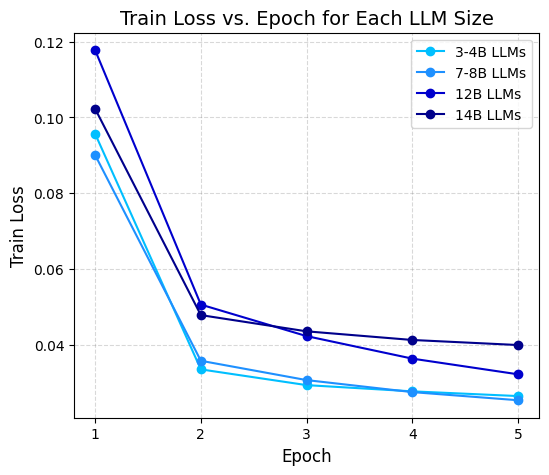

In [187]:
grouped = df_main.groupby(["model_size", "epoch"])["train_loss"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

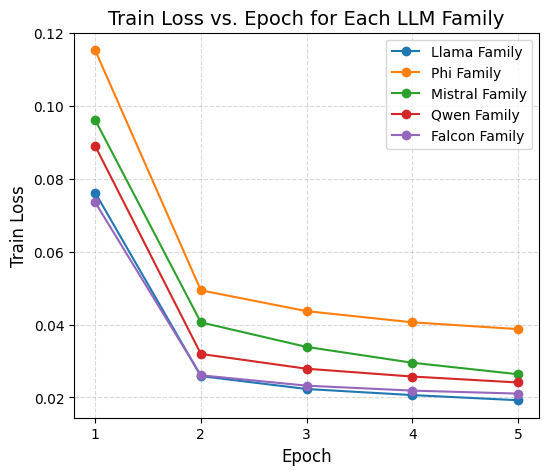

In [188]:
grouped = df_main.groupby(["model_family", "epoch"])["train_loss"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

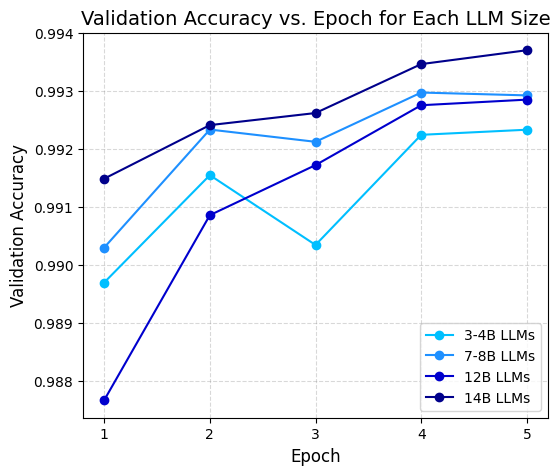

In [189]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

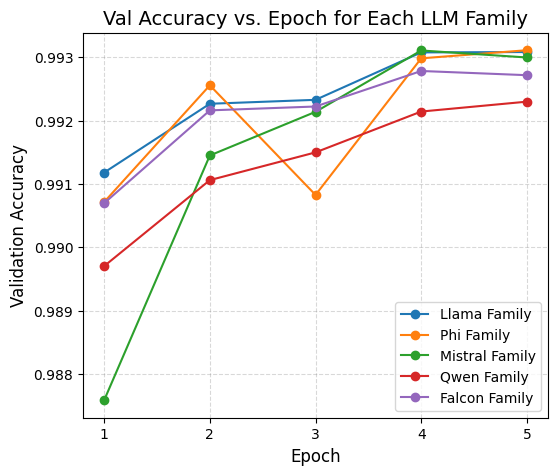

In [190]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [191]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model"])

In [192]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_200_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}

In [193]:
best_rows["model_size"] = best_rows["model"].map(model_sizes)
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,model_size,model_family
68,4,0.020219,0.052429,0.992642,0.992593,0.994661,0.990284,0.992467,0.999581,master-large,Falcon3-3B-Instruct,3000000000,Falcon Family
43,4,0.023535,0.051414,0.992925,0.992870,0.995278,0.990245,0.992755,0.999588,master-large,Falcon3-7B-Instruct,7000000000,Falcon Family
9,5,0.019984,0.047519,0.993516,0.993504,0.995615,0.991324,0.993465,0.999627,master-large,Llama-3.1-8B-Instruct,8000000000,Llama Family
18,4,0.019856,0.052474,0.992694,0.992683,0.994408,0.990874,0.992638,0.999615,master-large,Llama-3.2-3B-Instruct,3000000000,Llama Family
33,4,0.022739,0.049086,0.993462,0.993433,0.994818,0.991846,0.993330,0.999627,master-large,Ministral-8B-Instruct-2410,7000000000,Mistral Family
74,5,0.032164,0.057676,0.992848,0.992790,0.995774,0.989628,0.992692,0.999537,master-large,Mistral-Nemo-Instruct-2407,12200000000,Mistral Family
14,5,0.045887,0.050688,0.993639,0.993657,0.997067,0.990260,0.993652,0.999602,master-large,Phi-3-medium-128k-instruct,14000000000,Phi Family
79,5,0.032907,0.050130,0.992305,0.992327,0.996338,0.988326,0.992316,0.999607,master-large,Phi-3-mini-128k-instruct,4000000000,Phi Family
48,4,0.049302,0.058062,0.994028,0.994011,0.996547,0.991414,0.993974,0.999604,master-large,Phi-3-small-128k-instruct,7000000000,Phi Family
59,5,0.034409,0.052032,0.992054,0.992075,0.995969,0.988194,0.992067,0.999601,master-large,Phi-3.5-mini-instruct,4000000000,Phi Family


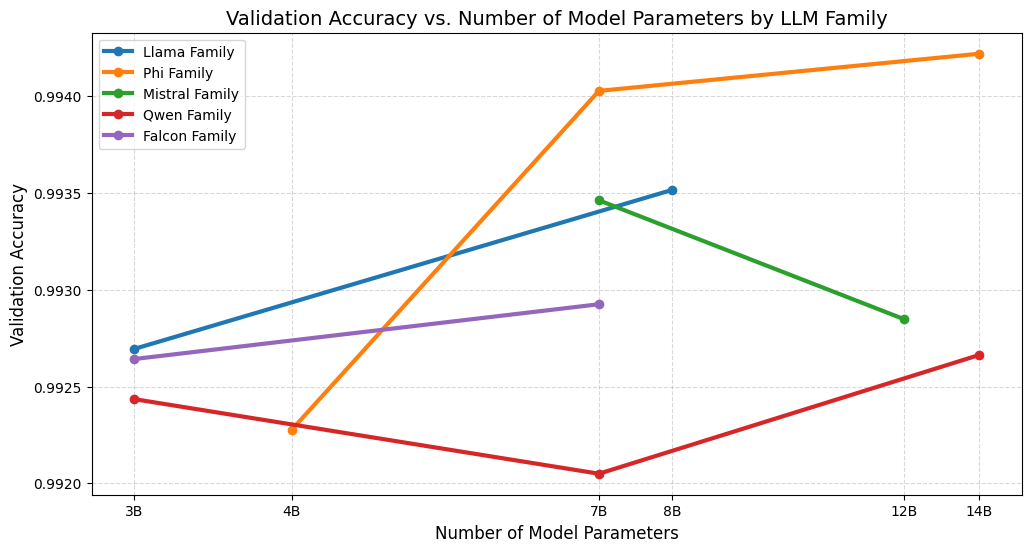

In [194]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model_family", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(12, 6))

model_fam_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

# Plot validation loss curves per model
for model_name in model_fam_order:
    model_data = grouped[grouped["model_family"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            linewidth=3,
        )

# Set x-axis to log scale
plt.xscale("log")

# Formatter to show billions as "3B", "7B", etc.
def billions_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{int(x // 1_000_000_000)}B"
    elif x >= 1_000_000:
        return f"{int(x // 1_000_000)}M"
    else:
        return str(int(x))

unique_sizes = sorted(grouped["model_size"].unique())
plt.xticks(
    unique_sizes,
    labels=[billions_formatter(size, None) for size in unique_sizes],
    fontsize=10
)
plt.minorticks_off()
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Number of Model Parameters by LLM Family", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()

In [195]:
paths_filtered = [path for path in paths if 'detect-gpt' in path]

In [196]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [197]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}

In [198]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

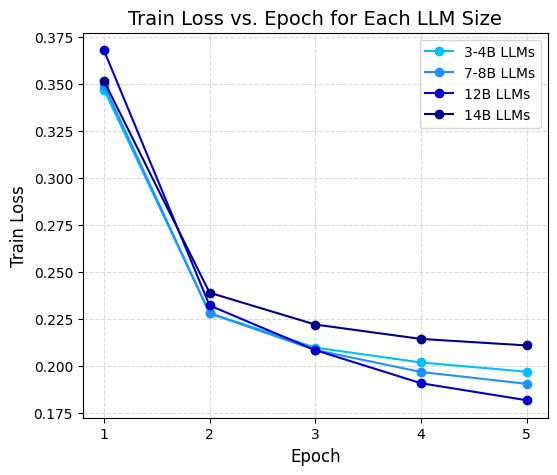

In [199]:
grouped = df_main.groupby(["model_size", "epoch"])["train_loss"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

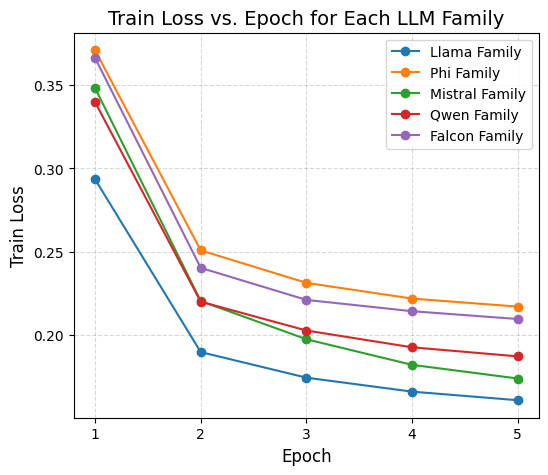

In [200]:
grouped = df_main.groupby(["model_family", "epoch"])["train_loss"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["train_loss"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Train Loss", fontsize=12)
plt.title("Train Loss vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

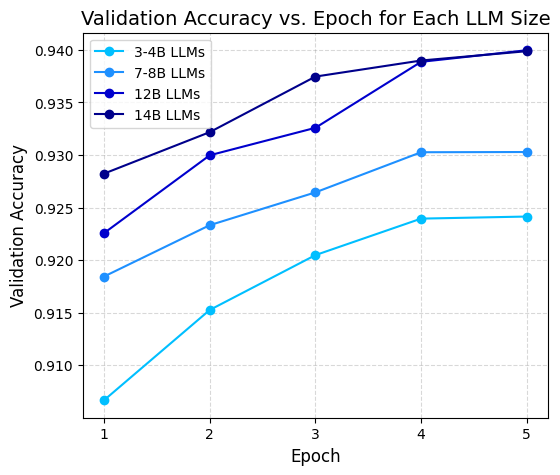

In [201]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

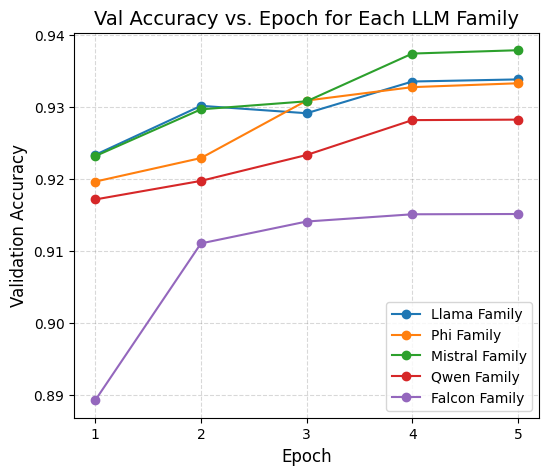

In [202]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [203]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model"])

In [204]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_200_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}

In [205]:
best_rows["model_size"] = best_rows["model"].map(model_sizes)
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,model_size,model_family
33,4,0.196843,0.285752,0.918099,0.918090,0.917073,0.917273,0.917173,0.974581,detect-gpt-4.1-nano-2025-04-14,Falcon3-3B-Instruct,3000000000,Falcon Family
29,5,0.227830,0.291254,0.912662,0.912667,0.910437,0.913161,0.911797,0.970734,detect-gpt-4.1-nano-2025-04-14,Falcon3-7B-Instruct,7000000000,Falcon Family
78,4,0.168402,0.229352,0.936991,0.936979,0.929501,0.945908,0.937633,0.982989,detect-gpt-4.1-nano-2025-04-14,Llama-3.1-8B-Instruct,8000000000,Llama Family
9,5,0.157800,0.263528,0.930891,0.930892,0.931800,0.930054,0.930926,0.981213,detect-gpt-4.1-nano-2025-04-14,Llama-3.2-3B-Instruct,3000000000,Llama Family
58,4,0.173221,0.226712,0.935940,0.935905,0.927708,0.946050,0.936789,0.981955,detect-gpt-4.1-nano-2025-04-14,Ministral-8B-Instruct-2410,7000000000,Mistral Family
39,5,0.181716,0.222019,0.939972,0.939956,0.936422,0.944489,0.940438,0.984783,detect-gpt-4.1-nano-2025-04-14,Mistral-Nemo-Instruct-2407,12200000000,Mistral Family
19,5,0.228189,0.218065,0.937985,0.937902,0.928435,0.950046,0.939116,0.984117,detect-gpt-4.1-nano-2025-04-14,Phi-3-medium-128k-instruct,14000000000,Phi Family
64,5,0.219053,0.247595,0.929037,0.928970,0.921764,0.938715,0.930163,0.980058,detect-gpt-4.1-nano-2025-04-14,Phi-3-mini-128k-instruct,4000000000,Phi Family
13,4,0.229239,0.216675,0.939265,0.939320,0.927214,0.952842,0.939853,0.984627,detect-gpt-4.1-nano-2025-04-14,Phi-3-small-128k-instruct,7000000000,Phi Family
49,5,0.198304,0.268144,0.924029,0.924015,0.923327,0.925986,0.924655,0.978394,detect-gpt-4.1-nano-2025-04-14,Phi-3.5-mini-instruct,4000000000,Phi Family


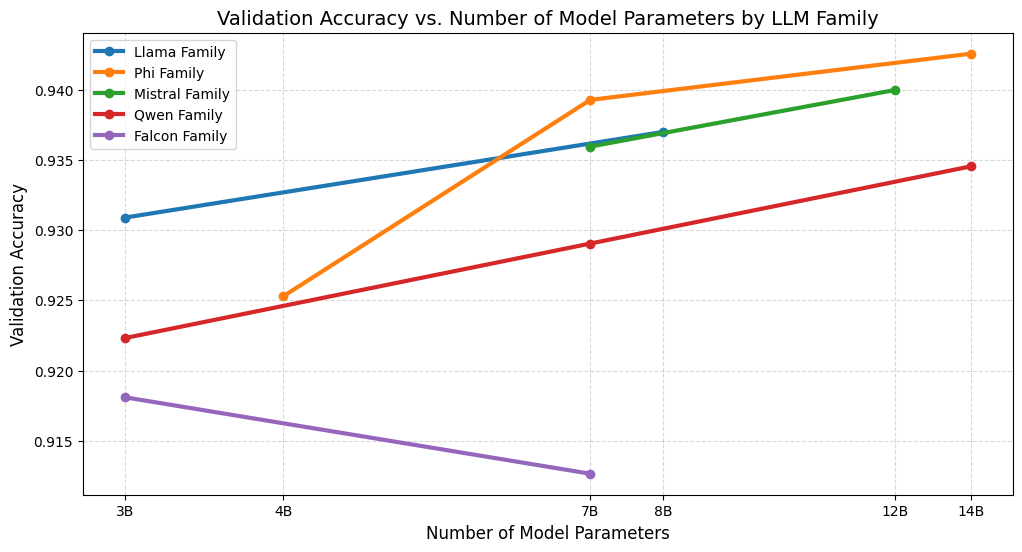

In [206]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model_family", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(12, 6))

model_fam_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

# Plot validation loss curves per model
for model_name in model_fam_order:
    model_data = grouped[grouped["model_family"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            linewidth=3,
        )

# Set x-axis to log scale
plt.xscale("log")

# Formatter to show billions as "3B", "7B", etc.
def billions_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{int(x // 1_000_000_000)}B"
    elif x >= 1_000_000:
        return f"{int(x // 1_000_000)}M"
    else:
        return str(int(x))

unique_sizes = sorted(grouped["model_size"].unique())
plt.xticks(
    unique_sizes,
    labels=[billions_formatter(size, None) for size in unique_sizes],
    fontsize=10
)
plt.minorticks_off()
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Number of Model Parameters by LLM Family", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()

In [207]:
best_rows[["model", "val_loss", "val_accuracy", "val_balanced_accuracy", "val_precision", "val_recall", "val_f1", "val_auc"]]

,model,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc
33,Falcon3-3B-Instruct,0.285752,0.918099,0.918090,0.917073,0.917273,0.917173,0.974581
29,Falcon3-7B-Instruct,0.291254,0.912662,0.912667,0.910437,0.913161,0.911797,0.970734
78,Llama-3.1-8B-Instruct,0.229352,0.936991,0.936979,0.929501,0.945908,0.937633,0.982989
9,Llama-3.2-3B-Instruct,0.263528,0.930891,0.930892,0.931800,0.930054,0.930926,0.981213
58,Ministral-8B-Instruct-2410,0.226712,0.935940,0.935905,0.927708,0.946050,0.936789,0.981955
39,Mistral-Nemo-Instruct-2407,0.222019,0.939972,0.939956,0.936422,0.944489,0.940438,0.984783
19,Phi-3-medium-128k-instruct,0.218065,0.937985,0.937902,0.928435,0.950046,0.939116,0.984117
64,Phi-3-mini-128k-instruct,0.247595,0.929037,0.928970,0.921764,0.938715,0.930163,0.980058
13,Phi-3-small-128k-instruct,0.216675,0.939265,0.939320,0.927214,0.952842,0.939853,0.984627
49,Phi-3.5-mini-instruct,0.268144,0.924029,0.924015,0.923327,0.925986,0.924655,0.978394


In [208]:
paths_filtered = [path for path in paths if 'detect' in path and "family" not in path and "gpt" not in path]
len(paths_filtered)

20

In [209]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [210]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "12-14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "12-14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12-14B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "12-14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}

In [211]:
color_map = {
    "3-4B LLMs": "#00BFFF",     # Vivid Deep Sky Blue
    "7-8B LLMs": "#1E90FF",    # Vivid Dodger Blue
    "12-14B LLMs": "#0000CD",   # Vivid Medium Blue
    "70B+ LLMs": "#00008B"     # Vivid Dark Blue
}

In [212]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

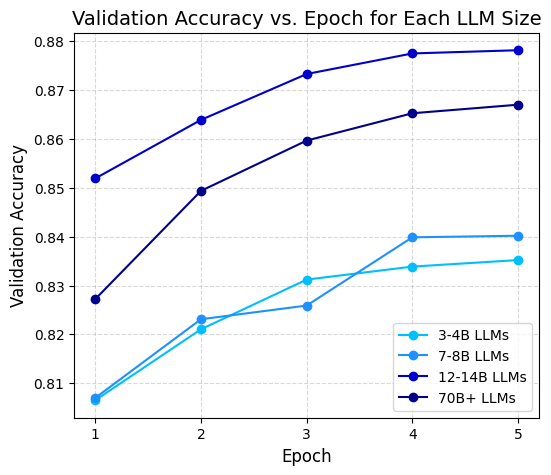

In [219]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12-14B LLMs", "70B+ LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

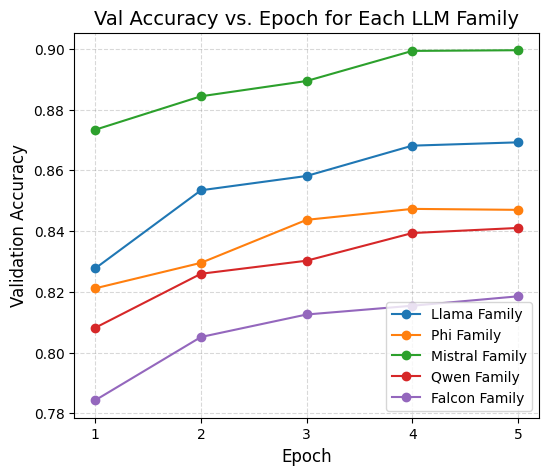

In [220]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [215]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_200_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 70_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 70_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}

In [216]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model"])

In [217]:
best_rows["model_size"] = best_rows["model"].map(model_sizes)
best_rows

,epoch,train_loss,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc,dataset,model,model_size,model_family
29,5,0.364916,0.496337,0.821354,0.821572,0.808595,0.832051,0.820155,0.902409,detect-Falcon3-3B-Instruct,Falcon3-3B-Instruct,3000000000,Falcon Family
59,5,0.400556,0.500528,0.815692,0.815478,0.812726,0.828306,0.820442,0.892987,detect-Falcon3-7B-Instruct,Falcon3-7B-Instruct,7000000000,Falcon Family
83,4,0.334404,0.417229,0.852335,0.851923,0.821033,0.904052,0.860545,0.921696,detect-Llama-3.1-8B-Instruct,Llama-3.1-8B-Instruct,8000000000,Llama Family
34,5,0.284541,0.386655,0.877130,0.876827,0.871456,0.890865,0.881054,0.944868,detect-Llama-3.2-3B-Instruct,Llama-3.2-3B-Instruct,3000000000,Llama Family
39,5,0.230139,0.330894,0.873181,0.873784,0.845249,0.908068,0.875533,0.941606,detect-Meta-Llama-3.1-70B-Instruct-AWQ-INT4,Meta-Llama-3.1-70B-Instruct-AWQ-INT4,70000000000,Llama Family
69,5,0.228100,0.332500,0.874900,0.872500,0.846900,0.909600,0.876200,0.940800,detect-Meta-Llama-3.3-70B-Instruct-AWQ-INT4,Meta-Llama-3.3-70B-Instruct-AWQ-INT4,70000000000,Llama Family
78,4,0.315914,0.342984,0.876540,0.876622,0.864914,0.890752,0.877643,0.946815,detect-Ministral-8B-Instruct-2410,Ministral-8B-Instruct-2410,7000000000,Mistral Family
54,5,0.219660,0.272584,0.922843,0.922861,0.919869,0.924792,0.922324,0.977912,detect-Mistral-Nemo-Instruct-2407,Mistral-Nemo-Instruct-2407,12200000000,Mistral Family
4,5,0.306638,0.327543,0.857965,0.858035,0.849846,0.860883,0.855329,0.933273,detect-Phi-3-medium-128k-instruct,Phi-3-medium-128k-instruct,14000000000,Phi Family
23,4,0.397389,0.478251,0.806521,0.806199,0.787965,0.843297,0.814693,0.886910,detect-Phi-3-mini-128k-instruct,Phi-3-mini-128k-instruct,4000000000,Phi Family


In [221]:
best_rows[["model", "val_loss", "val_accuracy", "val_balanced_accuracy", "val_precision", "val_recall", "val_f1", "val_auc"]]

,model,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc
29,Falcon3-3B-Instruct,0.496337,0.821354,0.821572,0.808595,0.832051,0.820155,0.902409
59,Falcon3-7B-Instruct,0.500528,0.815692,0.815478,0.812726,0.828306,0.820442,0.892987
83,Llama-3.1-8B-Instruct,0.417229,0.852335,0.851923,0.821033,0.904052,0.860545,0.921696
34,Llama-3.2-3B-Instruct,0.386655,0.877130,0.876827,0.871456,0.890865,0.881054,0.944868
39,Meta-Llama-3.1-70B-Instruct-AWQ-INT4,0.330894,0.873181,0.873784,0.845249,0.908068,0.875533,0.941606
69,Meta-Llama-3.3-70B-Instruct-AWQ-INT4,0.332500,0.874900,0.872500,0.846900,0.909600,0.876200,0.940800
78,Ministral-8B-Instruct-2410,0.342984,0.876540,0.876622,0.864914,0.890752,0.877643,0.946815
54,Mistral-Nemo-Instruct-2407,0.272584,0.922843,0.922861,0.919869,0.924792,0.922324,0.977912
4,Phi-3-medium-128k-instruct,0.327543,0.857965,0.858035,0.849846,0.860883,0.855329,0.933273
23,Phi-3-mini-128k-instruct,0.478251,0.806521,0.806199,0.787965,0.843297,0.814693,0.886910


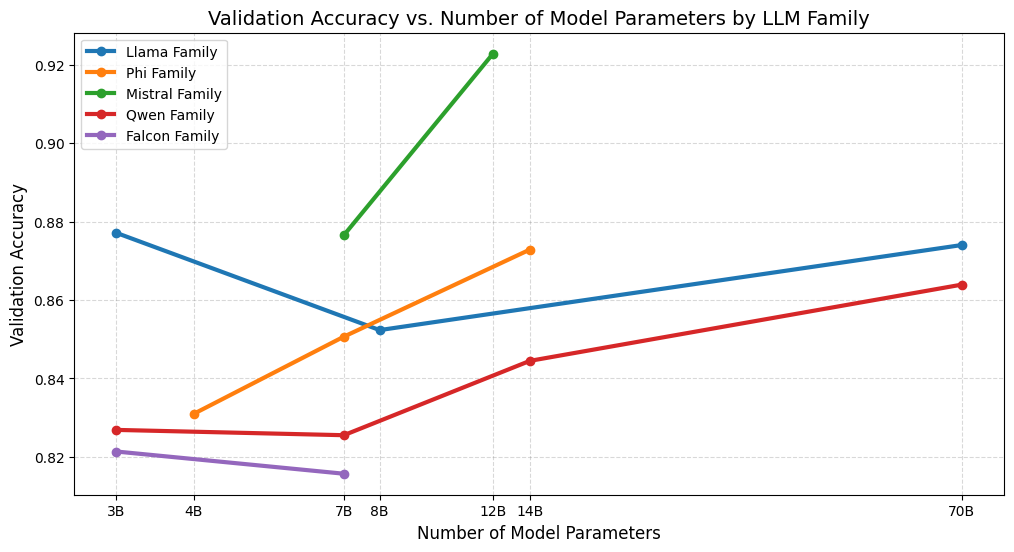

In [218]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model_family", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(12, 6))

model_fam_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

# Plot validation loss curves per model
for model_name in model_fam_order:
    model_data = grouped[grouped["model_family"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            linewidth=3,
        )

# Set x-axis to log scale
plt.xscale("log")

# Formatter to show billions as "3B", "7B", etc.
def billions_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{int(x // 1_000_000_000)}B"
    elif x >= 1_000_000:
        return f"{int(x // 1_000_000)}M"
    else:
        return str(int(x))

unique_sizes = sorted(grouped["model_size"].unique())
plt.xticks(
    unique_sizes,
    labels=[billions_formatter(size, None) for size in unique_sizes],
    fontsize=10
)
plt.minorticks_off()
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Number of Model Parameters by LLM Family", fontsize=14)
plt.legend(loc='upper left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()

In [236]:
paths_filtered = [path for path in paths if 'detect' in path and "family" in path]
len(paths_filtered)

16

In [237]:
paths_filtered

['training_history_finetune_Phi-4-mini-instruct_detect-phi-family.csv',
 'training_history_finetune_Phi-3-small-128k-instruct_detect-phi-family.csv',
 'training_history_finetune_Falcon3-3B-Instruct_detect-falcon-family.csv',
 'training_history_finetune_Falcon3-7B-Instruct_detect-falcon-family.csv',
 'training_history_finetune_Llama-3.1-8B-Instruct_detect-llama-family.csv',
 'training_history_finetune_Qwen2.5-7B-Instruct_detect-qwen-family.csv',
 'training_history_finetune_Qwen2-7B-Instruct_detect-qwen-family.csv',
 'training_history_finetune_Phi-3.5-mini-instruct_detect-phi-family.csv',
 'training_history_finetune_Mistral-Nemo-Instruct-2407_detect-mistral-family.csv',
 'training_history_finetune_Phi-3-mini-128k-instruct_detect-phi-family.csv',
 'training_history_finetune_Llama-3.2-3B-Instruct_detect-llama-family.csv',
 'training_history_finetune_Qwen2.5-3B-Instruct_detect-qwen-family.csv',
 'training_history_finetune_Qwen2.5-14B-Instruct_detect-qwen-family.csv',
 'training_history_fine

In [238]:
df_main = pd.DataFrame()
for path in paths_filtered:
    df = pd.read_csv(path, index_col=0)
    df["dataset"] = path.split("_")[-1].replace(".csv", "")
    df["model"] = path.split("_")[-2]
    df_main = pd.concat([df_main, df], axis=0)
df_main.reset_index(inplace=True)

In [239]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": "7-8B LLMs",
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": "70B+ LLMs",
    "Llama-3.2-3B-Instruct": "3-4B LLMs",
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": "70B+ LLMS ",

    # Microsoft
    "Phi-3-mini-128k-instruct": "3-4B LLMs",
    "Phi-3-small-128k-instruct": "7-8B LLMs",
    "Phi-3-medium-128k-instruct": "14B LLMs",
    "Phi-3.5-mini-instruct": "3-4B LLMs",
    "Phi-4-mini-instruct": "3-4B LLMs",
    "phi-4": "14B LLMs",

    # Mistral
    "Mistral-Nemo-Instruct-2407": "12B LLMs",
    "Ministral-8B-Instruct-2410": "7-8B LLMs",

    # Qwen
    "Qwen2-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-72B-Instruct-AWQ": "70B+ LLMs",
    "Qwen2.5-14B-Instruct": "14B LLMs",
    "Qwen2.5-7B-Instruct": "7-8B LLMs",
    "Qwen2.5-3B-Instruct": "3-4B LLMs",

    # Falcon
    "Falcon3-7B-Instruct": "7-8B LLMs",
    "Falcon3-3B-Instruct": "3-4B LLMs",
}

In [240]:
color_map = {
    "3-4B LLMs": "#00BFFF",     # Vivid Deep Sky Blue
    "7-8B LLMs": "#1E90FF",    # Vivid Dodger Blue
    "12B LLMs": "#0000CD",   # Vivid Medium Blue
    "14B LLMs": "#00008B"     # Vivid Dark Blue
}

In [241]:
df_main["model_size"] = df_main["model"].map(model_sizes)
df_main["model_family"] = df_main["model"].map(model_families)

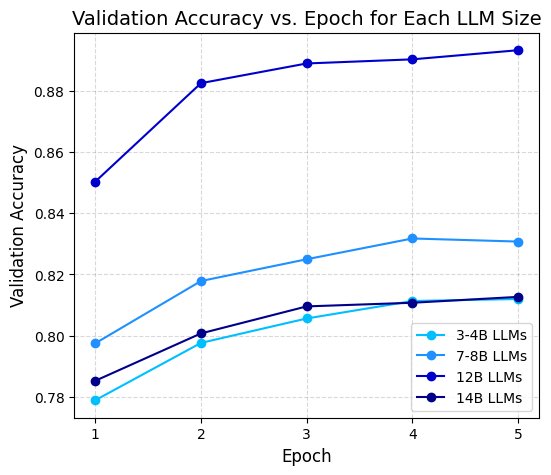

In [242]:
grouped = df_main.groupby(["model_size", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["3-4B LLMs", "7-8B LLMs", "12B LLMs", "14B LLMs"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_size"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model,
            color=color_map[model]
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Epoch for Each LLM Size", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

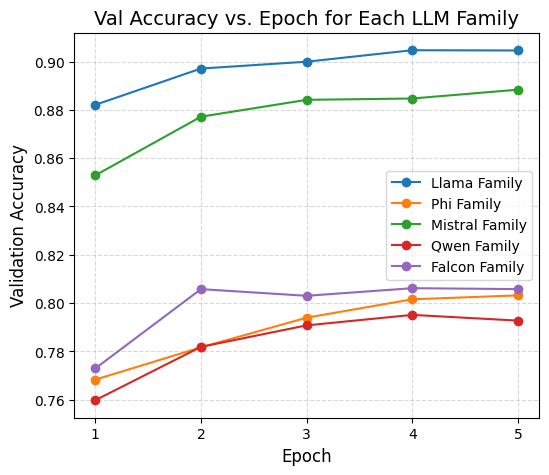

In [243]:
grouped = df_main.groupby(["model_family", "epoch"])["val_accuracy"].mean().reset_index()

model_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

plt.figure(figsize=(6, 5))
for model in model_order:
    # Filter for this model (if it exists in grouped)
    model_data = grouped[grouped["model_family"] == model]
    if not model_data.empty:
        plt.plot(
            model_data["epoch"],
            model_data["val_accuracy"],
            marker="o",
            label=model
        )
min_epoch = int(grouped["epoch"].min())
max_epoch = int(grouped["epoch"].max())
plt.xticks(np.arange(min_epoch, max_epoch + 1, 1), fontsize=10)

plt.yticks(fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Val Accuracy vs. Epoch for Each LLM Family", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.3, color='gray')
plt.show()

In [258]:
model_sizes = {
    # Meta
    "Llama-3.1-8B-Instruct": 8_000_000_000,
    "Meta-Llama-3.1-70B-Instruct-AWQ-INT4": 70_000_000_000,
    "Llama-3.2-3B-Instruct": 3_000_000_000,
    "Meta-Llama-3.3-70B-Instruct-AWQ-INT4": 70_000_000_000,

    # Microsoft
    "Phi-3-mini-128k-instruct": 4_000_000_000,
    "Phi-3-small-128k-instruct": 7_000_000_000,
    "Phi-3-medium-128k-instruct": 14_000_000_000,
    "Phi-3.5-mini-instruct": 4_000_000_000,
    "Phi-4-mini-instruct": 4_000_000_000,
    "phi-4": 14_000_000_000,

    # Mistral
    "Mistral-Nemo-Instruct-2407": 12_000_000_000,
    "Ministral-8B-Instruct-2410": 7_000_000_000,

    # Qwen
    "Qwen2-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2-7B-Instruct": 7_000_000_000,
    "Qwen2.5-72B-Instruct-AWQ": 72_000_000_000,
    "Qwen2.5-14B-Instruct": 14_000_000_000,
    "Qwen2.5-7B-Instruct": 7_000_000_000,
    "Qwen2.5-3B-Instruct": 3_000_000_000,

    # Falcon
    "Falcon3-7B-Instruct": 7_000_000_000,
    "Falcon3-3B-Instruct": 3_000_000_000,
}

In [259]:
total = 0
for k,v in model_sizes.items():
    total += v

In [260]:
total + 14_000_000_000

416000000000

In [261]:
8_000_000_000 + 14_000_000_000 + 12_000_000_000 + 14_000_000_000 + 7_000_000_000 + 14_000_000_000

69000000000

In [245]:
# for each model, dataset combination select only row with lowets val_accuracy
best_rows = df_main.loc[df_main.groupby(["model"])["val_accuracy"].idxmax()]
# sort by model and dataset size
best_rows = best_rows.sort_values(by=["model"])

In [246]:
best_rows["model_size"] = best_rows["model"].map(model_sizes)

In [247]:
best_rows[["model", "val_loss", "val_accuracy", "val_balanced_accuracy", "val_precision", "val_recall", "val_f1", "val_auc"]]

,model,val_loss,val_accuracy,val_balanced_accuracy,val_precision,val_recall,val_f1,val_auc
14,Falcon3-3B-Instruct,0.522911,0.806944,0.806947,0.805155,0.807850,0.806500,0.888509
18,Falcon3-7B-Instruct,0.513201,0.806592,0.806637,0.798483,0.818118,0.808181,0.886730
23,Llama-3.1-8B-Instruct,0.317884,0.910226,0.910204,0.909478,0.912820,0.911146,0.970541
54,Llama-3.2-3B-Instruct,0.356557,0.899475,0.899500,0.903417,0.896485,0.899938,0.963397
74,Ministral-8B-Instruct-2410,0.332862,0.883487,0.883197,0.894669,0.865032,0.879601,0.955184
44,Mistral-Nemo-Instruct-2407,0.319834,0.893209,0.892952,0.903263,0.876860,0.889866,0.962118
69,Phi-3-medium-128k-instruct,0.469734,0.807369,0.807238,0.809404,0.797340,0.803327,0.892658
49,Phi-3-mini-128k-instruct,0.502471,0.797778,0.797813,0.791939,0.800441,0.796168,0.883641
9,Phi-3-small-128k-instruct,0.483899,0.806420,0.806093,0.811503,0.788623,0.799899,0.889701
39,Phi-3.5-mini-instruct,0.504534,0.795271,0.794986,0.804166,0.773410,0.788488,0.880038


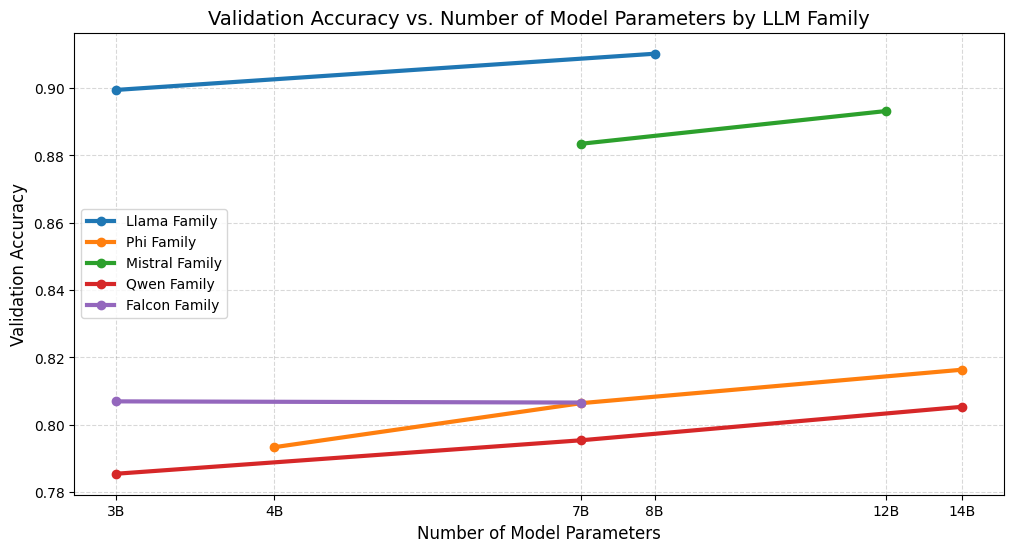

In [249]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compute the mean val_loss per model and dataset size
grouped = best_rows.groupby(["model_family", "model_size"])["val_accuracy"].mean().reset_index()

plt.figure(figsize=(12, 6))

model_fam_order = ["Llama Family", "Phi Family", "Mistral Family", "Qwen Family", "Falcon Family"]

# Plot validation loss curves per model
for model_name in model_fam_order:
    model_data = grouped[grouped["model_family"] == model_name]
    if not model_data.empty:
        plt.plot(
            model_data["model_size"],
            model_data["val_accuracy"],
            marker="o",
            label=model_name,
            linewidth=3,
        )

# Set x-axis to log scale
plt.xscale("log")

# Formatter to show billions as "3B", "7B", etc.
def billions_formatter(x, _):
    if x >= 1_000_000_000:
        return f"{int(x // 1_000_000_000)}B"
    elif x >= 1_000_000:
        return f"{int(x // 1_000_000)}M"
    else:
        return str(int(x))

unique_sizes = sorted(grouped["model_size"].unique())
plt.xticks(
    unique_sizes,
    labels=[billions_formatter(size, None) for size in unique_sizes],
    fontsize=10
)
plt.minorticks_off()
plt.yticks(fontsize=10)
plt.xlabel("Number of Model Parameters", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy vs. Number of Model Parameters by LLM Family", fontsize=14)
plt.legend(loc='center left', fontsize=10)

# Show only horizontal grid lines
plt.grid(True, linestyle="--", alpha=0.3, color='gray')

plt.show()